In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('dodgers.csv')

# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB
None


In [2]:
# Explore the structure of the data
print(data.head())

# Explore summary statistics
print(data.describe())


  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

  fireworks bobblehead  
0        NO         NO  
1        NO         NO  
2        NO         NO  
3       YES         NO  
4        NO         NO  
             day        attend       temp
count  81.000000     81.000000  81.000000
mean   16.135802  41040.074074  73.148148
std     9.605666   8297.539460   8.317318
min     1.000000  24312.000000  54.000000
25%     8.000000  34493.000000  67.000000
50%    15.000000  40284.000000  73.000000
75%    25.000000  46588.000000  79.000000
max    31.000000  56000.000000  95.0000

In [6]:
# Check for missing values
print(data.isnull().sum())


month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
Date           0
dtype: int64


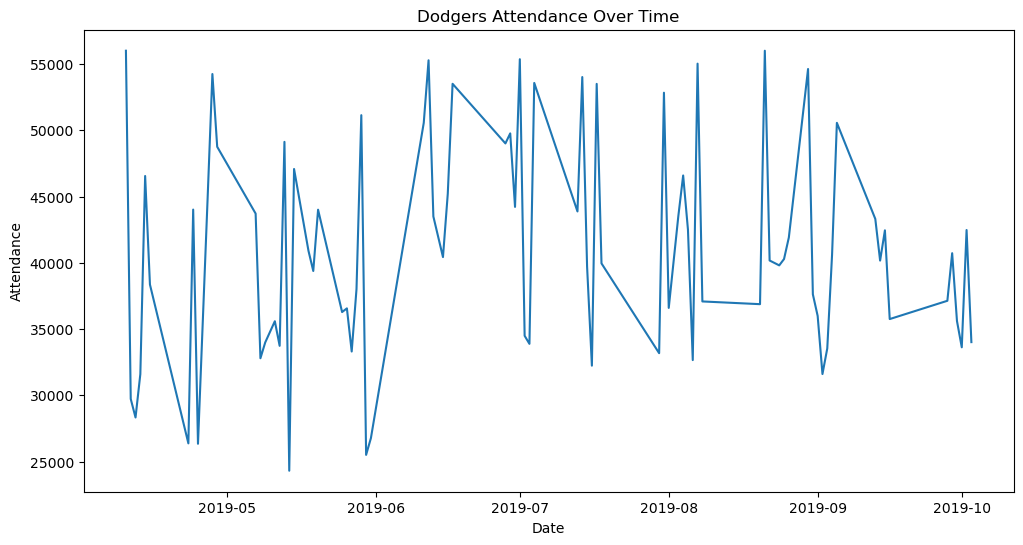

In [5]:
# Create a mapping for month abbreviations to numerical values
month_mapping = {
    'APR': 4,
    'MAY': 5,
    'JUN': 6,
    'JUL': 7,
    'AUG': 8,
    'SEP': 9,
    'OCT': 10
}

# Convert 'month' column to numerical values
data['month'] = data['month'].map(month_mapping)

# Create a 'Date' column by combining 'month' and 'day'
data['Date'] = pd.to_datetime(data[['month', 'day']].assign(year=2019))  # assuming the year is 2019

# Visualize attendance over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='attend', data=data)  # Use 'attend' instead of 'Attend'
plt.title('Dodgers Attendance Over Time')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.show()


C:\Users\bobby\AppData\Local\Temp\ipykernel_12536\830094649.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


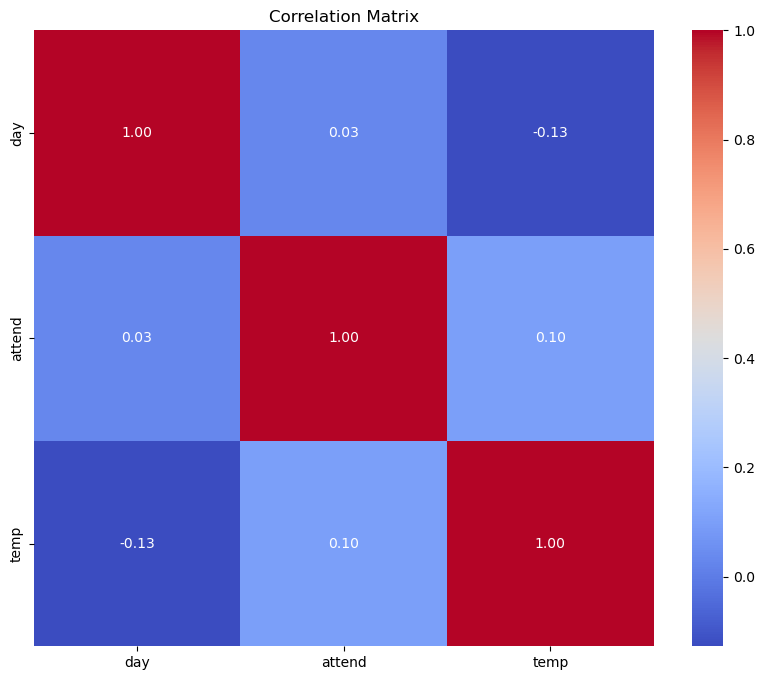

In [8]:
# Explore correlations between different variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [9]:
# There does not appear to be significant correlations between temp, day and attendance.

In [10]:
from scipy.stats import ttest_ind

# For 'fireworks'
yes_attendance = data[data['fireworks'] == 'YES']['attend']
no_attendance = data[data['fireworks'] == 'NO']['attend']

t_stat, p_value = ttest_ind(yes_attendance, no_attendance)
print(f'T-statistic: {t_stat}, p-value: {p_value}')


T-statistic: 0.01861600697988229, p-value: 0.9851943703995105


In [11]:
# Based on this t-test,
# there is no statistical evidence to support the idea that the presence of fireworks significantly influences attendance.

In [13]:
# For 'bobblehead'
yes_attendance = data[data['bobblehead'] == 'YES']['attend']
no_attendance = data[data['bobblehead'] == 'NO']['attend']

t_stat, p_value = ttest_ind(yes_attendance, no_attendance)
print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: 6.359553539813022, p-value: 1.2169642509120423e-08


In [14]:
# Based on this t-test, there is strong statistical evidence to support the idea that the 
# presence of bobblehead promotions significantly influences attendance.
# The positive T-statistic indicates that games with bobblehead promotions tend to have significantly
# higher attendance compared to games without bobblehead promotions.

In [15]:
# For 'shirt'
yes_attendance = data[data['shirt'] == 'YES']['attend']
no_attendance = data[data['shirt'] == 'NO']['attend']

t_stat, p_value = ttest_ind(yes_attendance, no_attendance)
print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: 1.1951789203122434, p-value: 0.23559272116450491


In [ ]:
# The results do not provide sufficient statistical evidence to support 
# the idea that the presence of shirt promotions significantly influences attendance.

In [16]:
# For 'cap'
yes_attendance = data[data['cap'] == 'YES']['attend']
no_attendance = data[data['cap'] == 'NO']['attend']

t_stat, p_value = ttest_ind(yes_attendance, no_attendance)
print(f'T-statistic: {t_stat}, p-value: {p_value}')

T-statistic: -0.48961356616462215, p-value: 0.625764198935014


In [ ]:
# The results do not provide sufficient statistical evidence to support 
# the idea that the presence of cap promotions significantly influences attendance.

In [33]:
from scipy.stats import pointbiserialr

# Remove leading whitespaces in the 'skies' column
data['skies'] = data['skies'].str.strip()

# Display unique values in the 'skies' column
print('Unique values in skies:', data['skies'].unique())

# Convert "clear" and "cloudy" to binary values (0 for clear, 1 for cloudy)
data['skies_binary'] = data['skies'].map({'Clear': 0, 'Cloudy': 1})

# Drop rows with missing values in either 'skies_binary' or 'attend'
data_cleaned = data.dropna(subset=['skies_binary', 'attend'])

# Ensure there are at least two unique values in 'skies_binary' and 'attend'
if data_cleaned['skies_binary'].nunique() >= 2 and data_cleaned['attend'].nunique() >= 2:
    # Calculate point-biserial correlation
    point_biserial_corr, p_value = pointbiserialr(data_cleaned['skies_binary'], data_cleaned['attend'])
    
    # Display the correlation coefficient and p-value
    print(f'Point-Biserial Correlation Coefficient: {point_biserial_corr:.4f}')
    print(f'P-value: {p_value:.4f}')
else:
    print('Insufficient unique values for correlation calculation.')


Unique values in skies: ['Clear' 'Cloudy']
Point-Biserial Correlation Coefficient: -0.1510
P-value: 0.1785


In [34]:
# There is not a statistically significant correlation

In [1]:
from scipy.stats import f_oneway

# Load the data
data = pd.read_csv('dodgers.csv')

# Perform one-way ANOVA
result = f_oneway(*[data['attend'][data['opponent'] == opponent] for opponent in data['opponent'].unique()])

# Display the result
print(f'ANOVA F-statistic: {result.statistic:.4f}')
print(f'P-value: {result.pvalue:.4f}')



D:\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ANOVA F-statistic: 1.3760
P-value: 0.1825


In [2]:
# There is not a statistically significant correlation

In [3]:
# Perform one-way ANOVA for days of the week
result_days = f_oneway(*[data['attend'][data['day_of_week'] == day] for day in data['day_of_week'].unique()])

# Display the result for days of the week
print(f'ANOVA F-statistic (Days of the Week): {result_days.statistic:.4f}')
print(f'P-value: {result_days.pvalue:.4f}')


ANOVA F-statistic (Days of the Week): 3.6440
P-value: 0.0032


In [4]:
#  There is a statistically significant difference in attendance across different days of the week.

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform one-way ANOVA for days of the week
result_days = f_oneway(*[data['attend'][data['day_of_week'] == day] for day in data['day_of_week'].unique()])

# Check if the overall ANOVA is significant
if result_days.pvalue < 0.05:
    # Perform Tukey's HSD test for pairwise comparisons
    tukey_results = pairwise_tukeyhsd(data['attend'], data['day_of_week'])

    # Display the results
    print(tukey_results)
else:
    print("ANOVA did not detect significant differences among days.")


        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
 group1    group2    meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------
  Friday    Monday  -5151.2564 0.6198 -14348.3212  4045.8084  False
  Friday  Saturday      2956.0 0.9537  -6055.2463 11967.2463  False
  Friday    Sunday   2151.9231 0.9907  -6859.3232 11163.1694  False
  Friday  Thursday    290.4769    1.0 -11799.3787 12380.3325  False
  Friday   Tuesday   7624.3077 0.1522  -1386.9386  16635.554  False
  Friday Wednesday  -2531.7564 0.9805 -11728.8212  6665.3084  False
  Monday  Saturday   8107.2564 0.1202  -1089.8084 17304.3212  False
  Monday    Sunday   7303.1795 0.2105  -1893.8853 16500.2442  False
  Monday  Thursday   5441.7333 0.8265  -6787.2506 17670.7173  False
  Monday   Tuesday  12775.5641 0.0013   3578.4993 21972.6289   True
  Monday Wednesday      2619.5  0.979  -6759.7025 11998.7025  False
Saturday    Sunday   -804.0769    1.0  -9815.323

In [7]:
# Significant differences in attendance are observed between Monday and Tuesday, as well as between Tuesday and Wednesday.
# No significant differences are observed between other pairs of days.

## My recommendation to management on how to improve attendance


   After my analysis of the data, it appears that the most reliable factors to determine attendance are the day of the week and whether there is a bobblehead offered or not. The games that had bobbleheads regularly had higher attendance, and the games held on Tuesdays regularly had higher attendance than other days of the week. While these analyses suggest a statistical association, there could be other factors influencing attendance that were not considered in the analysis. Additionally, the preferences of the fan base and other external factors may play a role.